## Objective 

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days.

In [1]:
pwd

'/Users/abubakarbajwa'

In [2]:
import pandas as pd

In [3]:
df_covid =  pd.read_csv('/Users/abubakarbajwa/desktop/COVID 19 Data/covid_19_data.csv')

In [4]:
df_covid.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta

In [7]:
print("shape of the dataset: ", df_covid.shape)
print("null values in the dataset: ", df_covid.isnull().sum())

shape of the dataset:  (22512, 8)
null values in the dataset:  SNo                    0
ObservationDate        0
Province/State     11646
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [8]:
print('datatype : ', df_covid.dtypes)

datatype :  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [9]:
df_covid.drop(["SNo"],1,inplace=True)

In [10]:
df_covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [11]:
df_covid['ObservationDate'] = pd.to_datetime(df_covid['ObservationDate'])

In [12]:
df_covid.dtypes


ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [13]:
datewise=df_covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [14]:
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-05-03,3506729.0,1125236.0,247470.0
2020-05-04,3583055.0,1162724.0,251537.0
2020-05-05,3662691.0,1198832.0,257239.0


In [15]:
datewise["Days since"] = datewise.index-datewise.index.min()


In [16]:
datewise

,Confirmed,Recovered,Deaths,Days since
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,0 days
2020-01-23,653.0,30.0,18.0,1 days
2020-01-24,941.0,36.0,26.0,2 days
2020-01-25,1438.0,39.0,42.0,3 days
2020-01-26,2118.0,52.0,56.0,4 days
...,...,...,...,...
2020-05-03,3506729.0,1125236.0,247470.0,102 days
2020-05-04,3583055.0,1162724.0,251537.0,103 days
2020-05-05,3662691.0,1198832.0,257239.0,104 days


In [17]:
print("Basic Info")
print("Number of countries which infected: ", len(df_covid["Country/Region"].unique()))

Basic Info
Number of countries which infected:  222


In [18]:
print("Total num of confirmed cases: ",datewise["Confirmed"].iloc[-1])

Total num of confirmed cases:  3845718.0


In [19]:
print("Total num of recovered cases: ",datewise["Recovered"].iloc[-1])
print("Total num of deats: ",datewise["Deaths"].iloc[-1])

Total num of recovered cases:  1284741.0
Total num of deats:  269567.0


In [20]:
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]
                                                         -datewise["Deaths"].iloc[-1]))

Total number of Active Cases around the World:  2291410.0


In [21]:
print("Total num of closed cases: ", (datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Total num of closed cases:  1554308.0


In [22]:
datewise.shape[0]

107

In [23]:
np.round?

In [24]:
print("Approximate daily confirmed cases :", np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))

Approximate daily confirmed cases : 35941.0


In [25]:
print("Approximate daily recovered cases :", np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))

Approximate daily recovered cases : 12007.0


In [26]:
print("Approximate daily Deaths  :", np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))

Approximate daily Deaths  : 2519.0


In [27]:
print("Approximate confirmed cases per hour :", np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))

Approximate confirmed cases per hour : 1498.0


In [28]:
print("Approximate recovered cases per hour :", np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate Deaths per hour :", np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))

Approximate recovered cases per hour : 500.0
Approximate Deaths per hour : 105.0


In [29]:
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])

Number of Confirmed Cases in last 24 hours:  90377.0


In [30]:
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])

Number of Recovered Cases in last 24 hours:  39328.0


In [31]:
print("Number of Deaths in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Number of Deaths in last 24 hours:  5736.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]), <a list of 107 Text xticklabel objects>)

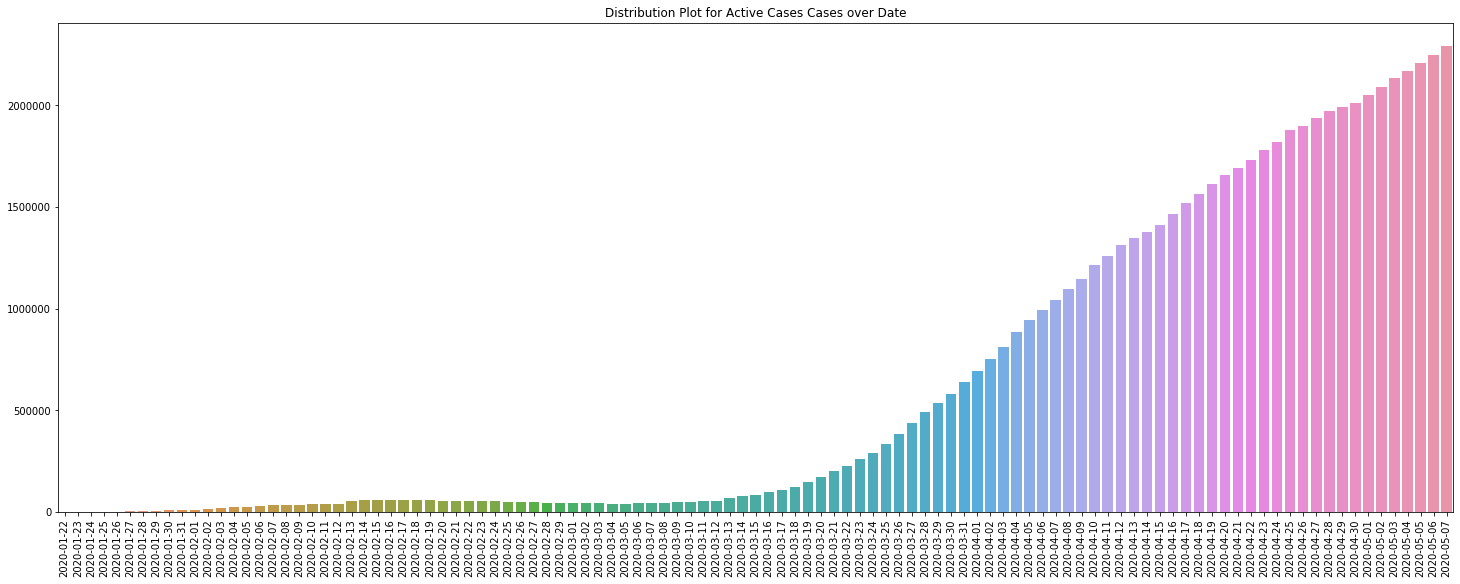

In [32]:
plt.figure(figsize=(25,9))
sns.barplot(x=datewise.index.date, y = datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"] )
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Total num of closed cases till date')

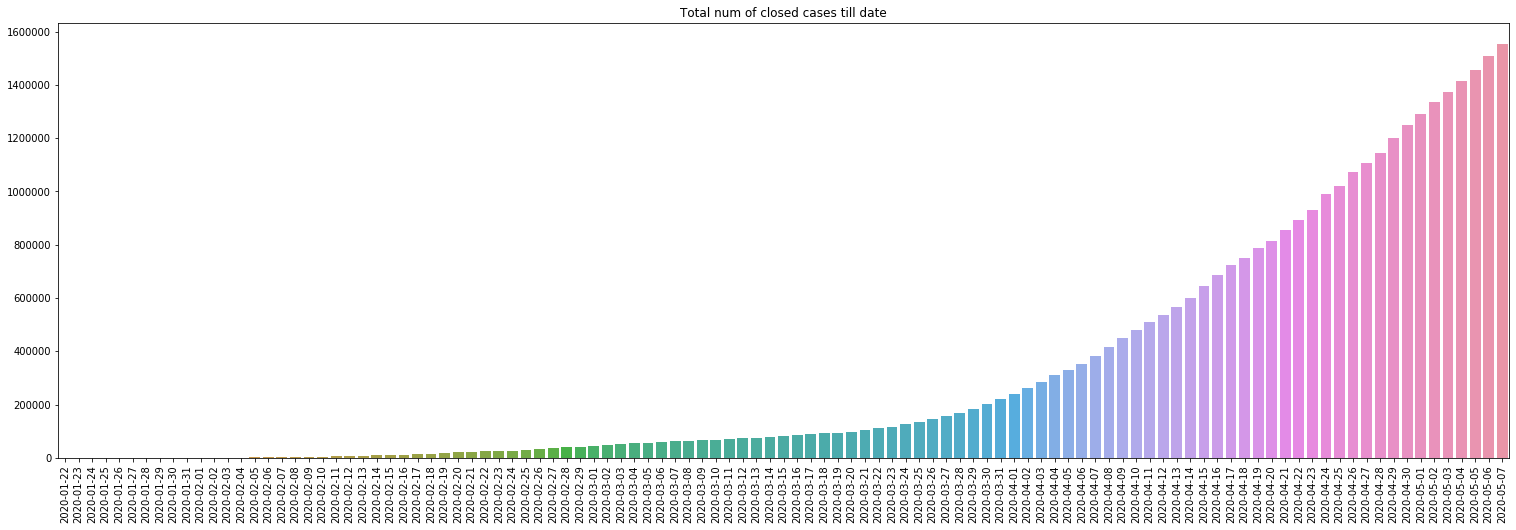

In [33]:
plt.figure(figsize=(26,8))
sns.barplot(x=datewise.index.date, y = datewise["Recovered"]+ datewise["Deaths"])
plt.xticks(rotation=90)
plt.title("Total num of closed cases till date")

In [34]:
datewise["WeekOfYear"]=datewise.index.weekofyear

In [35]:
datewise

,Confirmed,Recovered,Deaths,Days since,WeekOfYear
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4
2020-01-23,653.0,30.0,18.0,1 days,4
2020-01-24,941.0,36.0,26.0,2 days,4
2020-01-25,1438.0,39.0,42.0,3 days,4
2020-01-26,2118.0,52.0,56.0,4 days,4
...,...,...,...,...,...
2020-05-03,3506729.0,1125236.0,247470.0,102 days,18
2020-05-04,3583055.0,1162724.0,251537.0,103 days,19
2020-05-05,3662691.0,1198832.0,257239.0,104 days,19


In [36]:
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

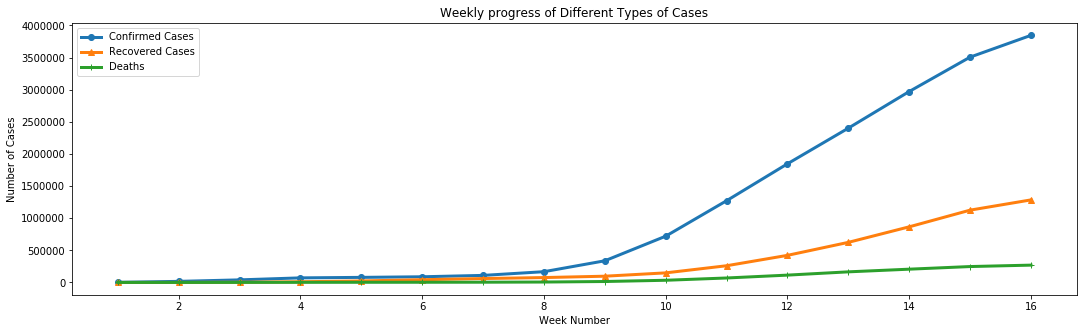

In [37]:
plt.figure(figsize=(18,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,marker="o", label='Confirmed Cases')
plt.plot(week_num,weekwise_recovered,linewidth=3,marker="^", label='Recovered Cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,marker="+", label='Deaths')
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend()


Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

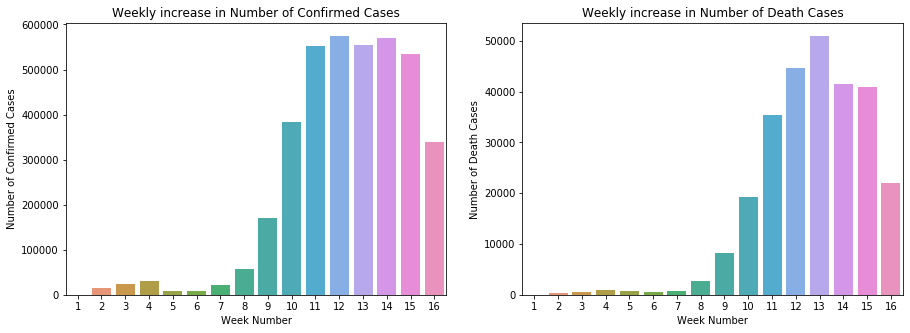

In [38]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

Growth rate of confirmed recovered and death cases

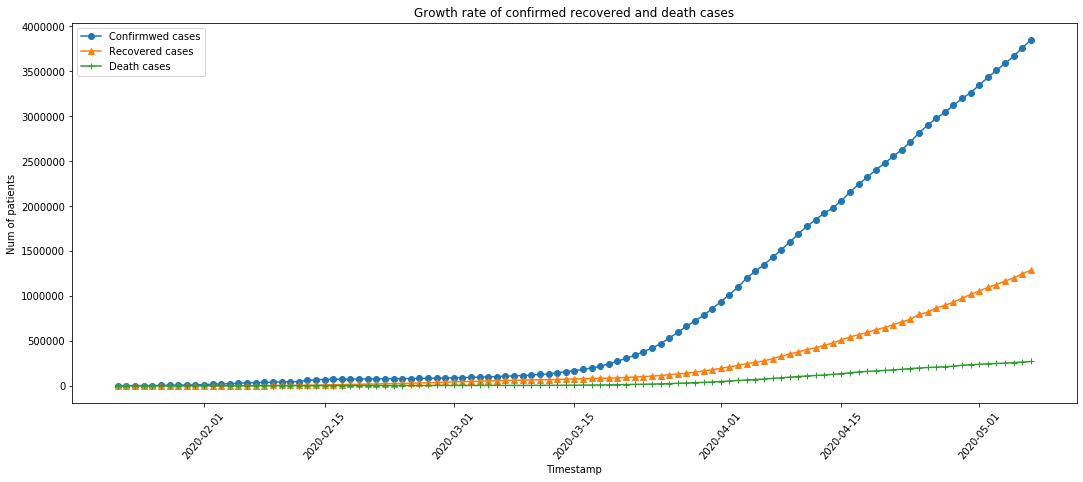

In [39]:
plt.figure(figsize=(18,7))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmwed cases")
plt.plot(datewise["Recovered"],marker="^",label="Recovered cases")
plt.plot(datewise["Deaths"],marker="+",label="Death cases")
plt.xticks(rotation="50")
plt.ylabel("Num of patients")
plt.xlabel("Timestamp")
plt.title("Growth rate of confirmed recovered and death cases")
plt.legend()

Moratality and Recovery Rate analysis around the World

In [40]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"] = (datewise["Deaths"]/datewise["Confirmed"])*100 
datewise["Recovery Rate"] = (datewise["Recovered"]/datewise["Confirmed"])*100 
datewise["Active Cases"] = (datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]) 
datewise["Closed Cases"] = (datewise["Deaths"]+datewise["Recovered"]) 

In [41]:
datewise

,Confirmed,Recovered,Deaths,Days since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,1 days,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,2 days,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,3 days,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4 days,4,2.644004,2.455146,2010.0,108.0
...,...,...,...,...,...,...,...,...,...
2020-05-03,3506729.0,1125236.0,247470.0,102 days,18,7.057004,32.087909,2134023.0,1372706.0
2020-05-04,3583055.0,1162724.0,251537.0,103 days,19,7.020182,32.450632,2168794.0,1414261.0
2020-05-05,3662691.0,1198832.0,257239.0,104 days,19,7.023224,32.730907,2206620.0,1456071.0


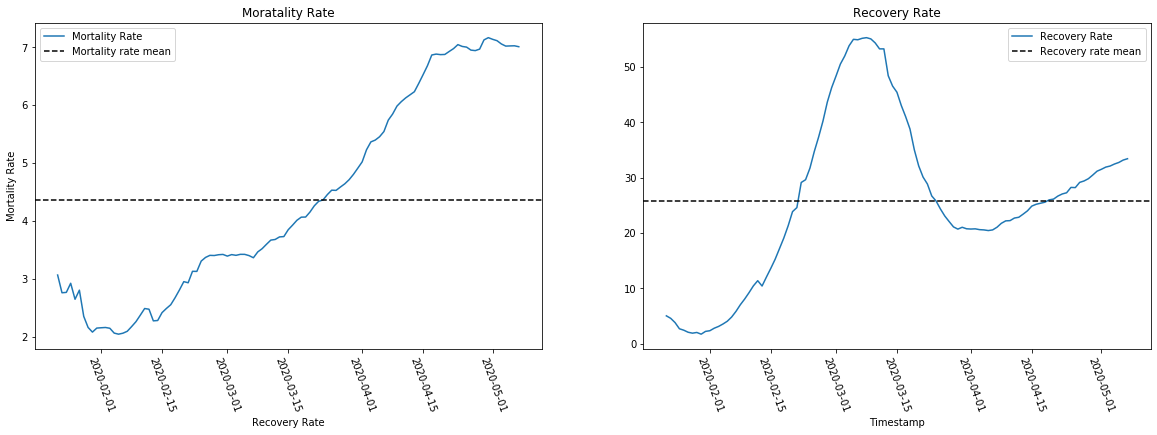

In [42]:
# ploting mortality and Recovery rate
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label="Mortality Rate")
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax1.set_title("Moratality Rate")
ax2.set_title("Recovery Rate")
ax1.set_xlabel("Timestamp")
ax2.set_xlabel("Timestamp")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Recovery Rate")
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
for tick in ax2.get_xticklabels():
    tick.set_rotation(-70)
ax1.axhline(datewise["Mortality Rate"].mean(),label="Mortality rate mean", linestyle="--", color='black')
ax2.axhline(datewise["Recovery Rate"].mean(),label="Recovery rate mean", linestyle="--", color='black')
ax2.legend()
ax1.legend()

In [43]:
print("Average mortality rate mean", datewise["Mortality Rate"].mean())
print("Average mortality rate median", datewise["Mortality Rate"].median())
print("Average recovery rate mean", datewise["Recovery Rate"].mean())
print("Average recovery rate median", datewise["Recovery Rate"].median())

Average mortality rate mean 4.356575666335491
Average mortality rate median 3.845993060490782
Average recovery rate mean 25.77656379002784
Average recovery rate median 25.183274359428182


In [44]:
print("Average Increase in number of confirmed cases every day :",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average Increase in number of recovered cases every day :",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average Increase in number of death cases every day :",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average Increase in number of confirmed cases every day : 35936.0
Average Increase in number of recovered cases every day : 12007.0
Average Increase in number of death cases every day : 2519.0


Text(0.5, 0, 'Timestamp')

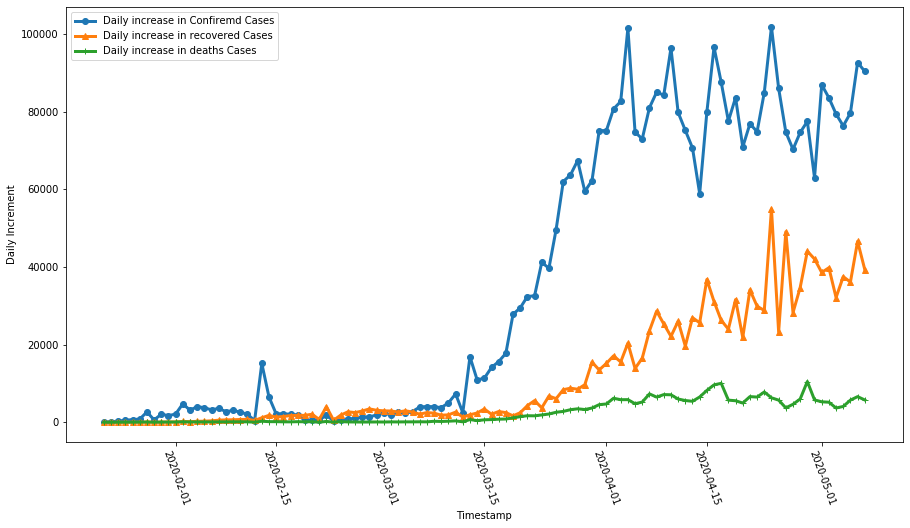

In [45]:
plt.figure(figsize=(15,8))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3,marker="o")
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered Cases",linewidth=3,marker="^")
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in deaths Cases",linewidth=3,marker="+")
plt.legend()
plt.xticks(rotation=-70)
plt.ylabel("Daily Increment")
plt.xlabel("Timestamp")

Growth Factor of different Types of Cases Worldwide


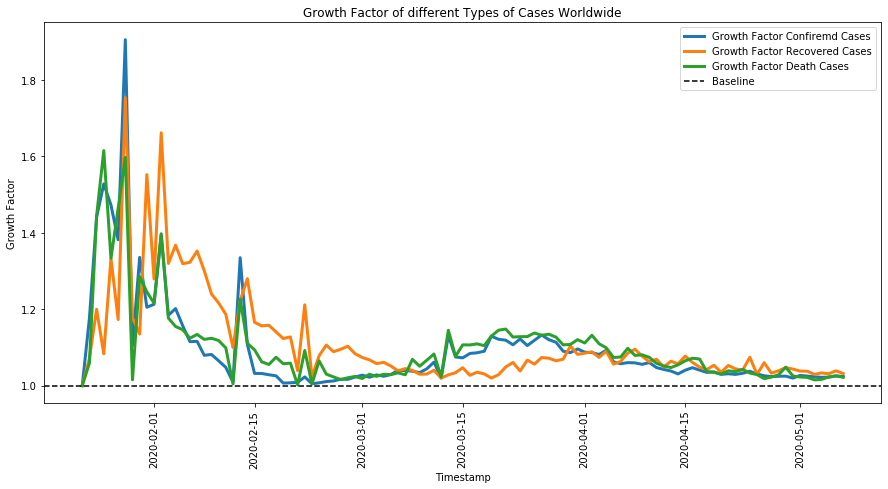

In [46]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

In [47]:
c=5000
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [48]:
C,double_days

([5000, 10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2560000],
 [Timedelta('5 days 00:00:00'),
  Timedelta('9 days 00:00:00'),
  Timedelta('12 days 00:00:00'),
  Timedelta('17 days 00:00:00'),
  Timedelta('33 days 00:00:00'),
  Timedelta('52 days 00:00:00'),
  Timedelta('59 days 00:00:00'),
  Timedelta('65 days 00:00:00'),
  Timedelta('74 days 00:00:00'),
  Timedelta('90 days 00:00:00')])

In [49]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=("No. of cases","Days since first Case"))
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])

In [50]:
doubling_rate

,No. of cases,Days since first Case,Number of days for doubling
0,5000,5 days,5 days
1,10000,9 days,4 days
2,20000,12 days,3 days
3,40000,17 days,5 days
4,80000,33 days,16 days
5,160000,52 days,19 days
6,320000,59 days,7 days
7,640000,65 days,6 days
8,1280000,74 days,9 days
9,2560000,90 days,16 days


In [51]:
countrywise = df_covid[df_covid["ObservationDate"]==df_covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)

In [52]:
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,1257023.0,195036.0,75662.0,6.019142,15.515707
Spain,221447.0,128511.0,26070.0,11.772569,58.032396
Italy,215858.0,96276.0,29958.0,13.878568,44.601544
UK,207977.0,970.0,30689.0,14.755959,0.466398
Russia,177160.0,23803.0,1625.0,0.917250,13.435877
...,...,...,...,...,...
Comoros,8.0,0.0,1.0,12.500000,0.000000
Mauritania,8.0,6.0,1.0,12.500000,75.000000
Papua New Guinea,8.0,8.0,0.0,0.000000,100.000000


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

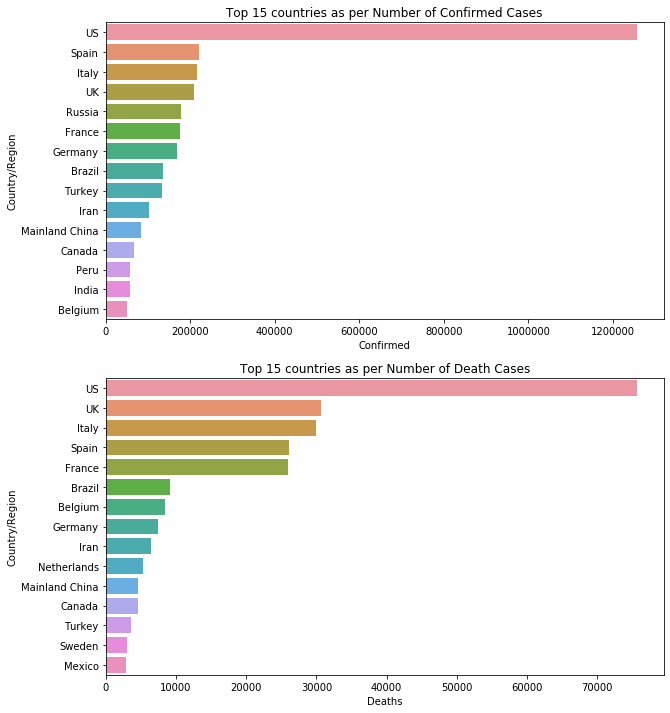

In [53]:
fig, (ax1,ax2) = plt.subplots(2, 1 ,figsize=(10,   12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths = countrywise.sort_values(["Deaths"], ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Text(0.5, 0, 'Recovery (in Percentage)')

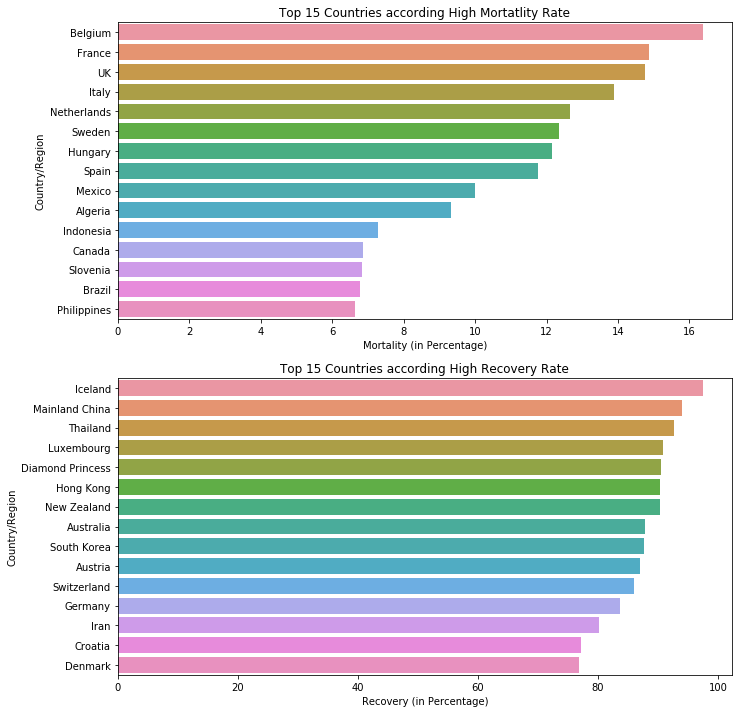

In [54]:
fig, (ax1,ax2) = plt.subplots(2, 1 , figsize = (11, 12))
plot_mortality_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Mortality"],ascending = False).head(15)
plot_recovery_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Recovery"],ascending = False).head(15)
sns.barplot(x  = plot_mortality_rate["Mortality"],y = plot_mortality_rate.index , ax = ax1)
sns.barplot(x  = plot_recovery_rate["Recovery"],y = plot_recovery_rate.index , ax = ax2)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

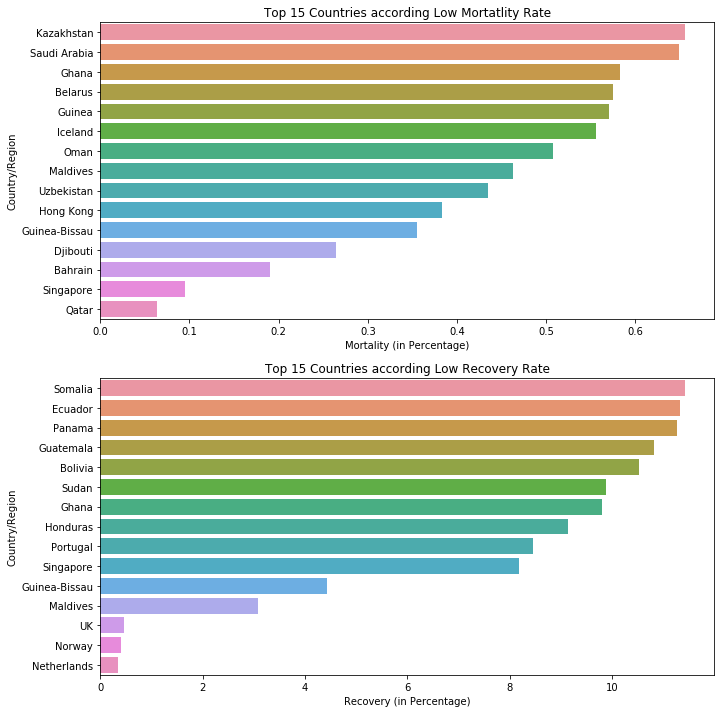

In [55]:
fig, (ax1,ax2) = plt.subplots(2, 1 , figsize = (11, 12))
plot_mortality_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Mortality"],ascending = False).tail(15)
plot_recovery_rate = countrywise[countrywise["Confirmed"] > 500].sort_values(["Recovery"],ascending = False).tail(15)
sns.barplot(x  = plot_mortality_rate["Mortality"],y = plot_mortality_rate.index , ax = ax1)
sns.barplot(x  = plot_recovery_rate["Recovery"],y = plot_recovery_rate.index , ax = ax2)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

In [56]:
country_no_recovery = countrywise[countrywise["Recovered"] == 0][["Confirmed","Deaths"]]
country_no_recovery["Mortality Rate"] = (country_no_recovery["Deaths"] / country_no_recovery["Confirmed"])*100
country_no_recovery = country_no_recovery[country_no_recovery["Mortality Rate"] > 0 ].sort_values(["Mortality Rate"], ascending = False)
country_no_recovery.style.background_gradient("Reds")

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9,2,22.2222
Comoros,8,1,12.5
Tajikistan,461,12,2.60304


In [57]:
no_death = countrywise[(countrywise["Confirmed"] > 100)&(countrywise["Deaths"] == 0)]
no_death = no_death[no_death["Recovery"]>0].sort_values(["Recovery"], ascending = False).drop(["Mortality"],1)
no_death.style.background_gradient("Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,122,120,0,98.3607
Vietnam,288,233,0,80.9028
Uganda,101,55,0,54.4554
Madagascar,193,101,0,52.3316
Rwanda,271,133,0,49.0775
Nepal,101,22,0,21.7822


In [58]:
countrywise["Active Cases"] = countrywise["Confirmed"] - (countrywise["Deaths"] + countrywise ["Recovered"])

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Active Cases')

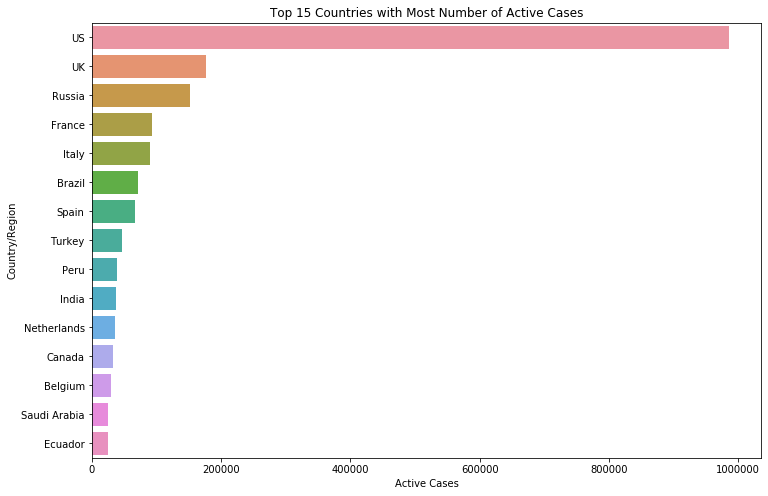

In [59]:
plt.figure(figsize=(12,8))
top_15_active_country = countrywise.sort_values(["Active Cases"],ascending = False).head(15)
sns.barplot(x = top_15_active_country["Active Cases"] , y = top_15_active_country.index )
plt.title("Top 15 Countries with Most Number of Active Cases")

In [60]:
country_date=df_covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.ix[country].shape[0]
    confirm_rate.append((countrywise.ix[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

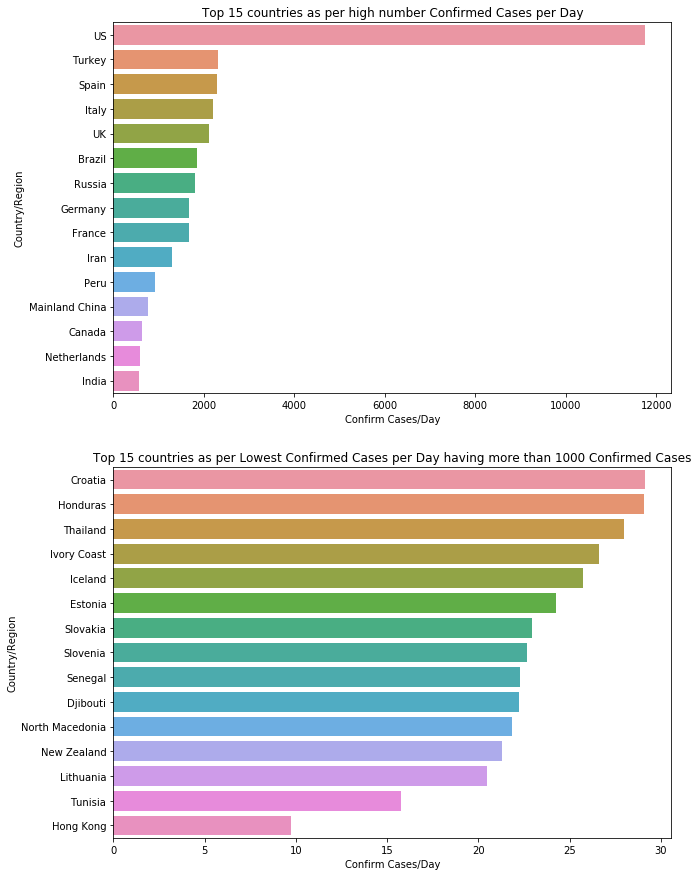

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")


Mean Survival Probability across all countries 95.8947658008861
Median Survival Probability across all countries 97.14031520081342
Mean Death Probability across all countries 4.1052341991138945
Median Death Probability across all countries 2.8596847991865815


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

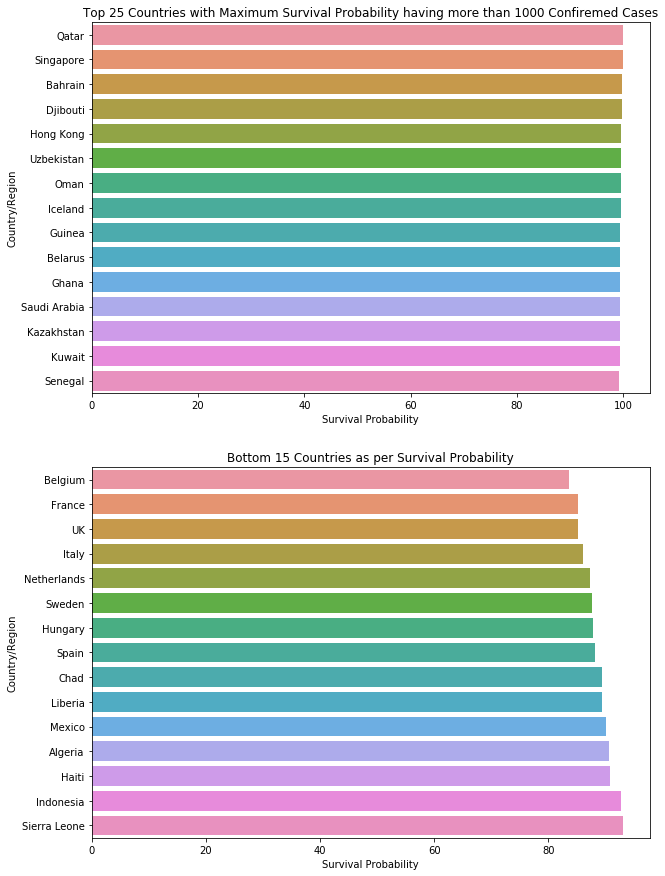

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

In [63]:
grouped_country=df_covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [64]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

Text(0.5, 1.0, 'COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases')

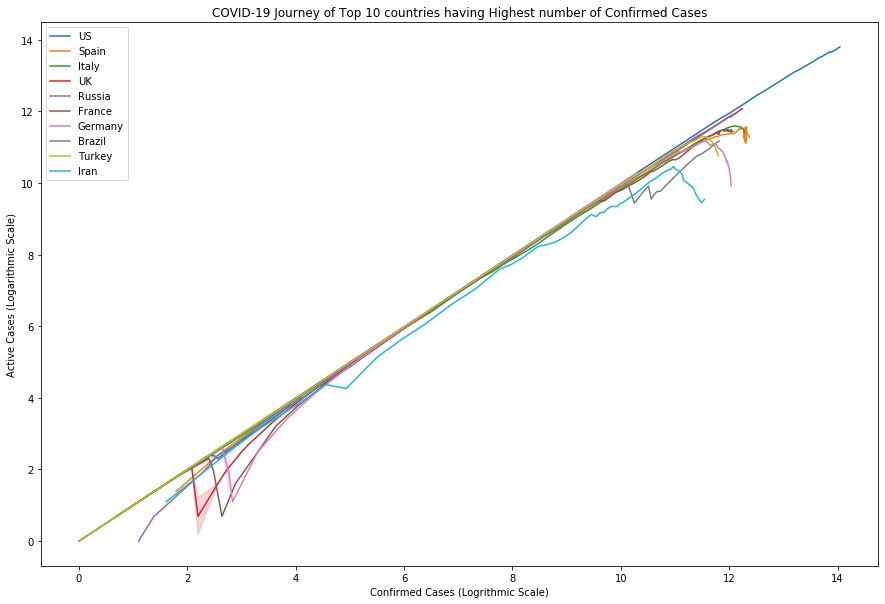

In [65]:
plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.ix[country]["log_confirmed"],y=grouped_country.ix[country]["log_active"],label=country)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")

In [66]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Confirm Cases/Day,Survival Probability
Country/Region,,,,,,,,
US,1257023.0,195036.0,75662.0,6.019142,15.515707,986325.0,11747.878505,93.980858
Spain,221447.0,128511.0,26070.0,11.772569,58.032396,66866.0,2282.958763,88.227431
Italy,215858.0,96276.0,29958.0,13.878568,44.601544,89624.0,2202.632653,86.121432
UK,207977.0,970.0,30689.0,14.755959,0.466398,176318.0,2122.214286,85.244041
Russia,177160.0,23803.0,1625.0,0.917250,13.435877,151732.0,1807.755102,99.082750
...,...,...,...,...,...,...,...,...
Comoros,8.0,0.0,1.0,12.500000,0.000000,7.0,1.000000,87.500000
Mauritania,8.0,6.0,1.0,12.500000,75.000000,1.0,0.145455,87.500000
Papua New Guinea,8.0,8.0,0.0,0.000000,100.000000,0.0,0.163265,100.000000


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
std=StandardScaler()

In [68]:
X=countrywise[["Confirmed","Deaths"]]
X=std.fit_transform(X)

In [69]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

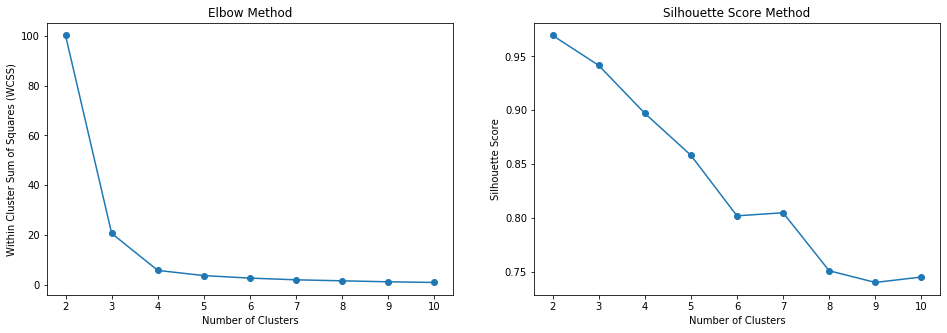

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [76]:
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [77]:
countrywise["Clusters"] = clf_final.predict(X)

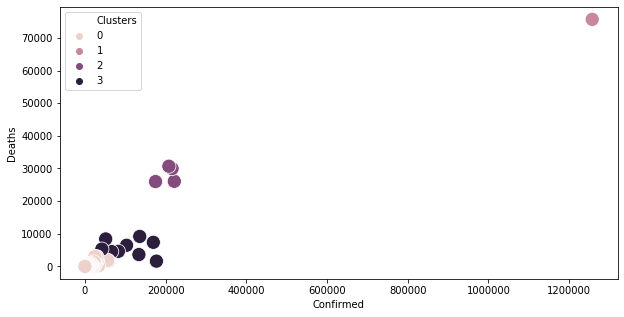

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Confirmed"],y=countrywise["Deaths"],hue=countrywise["Clusters"],s=200)

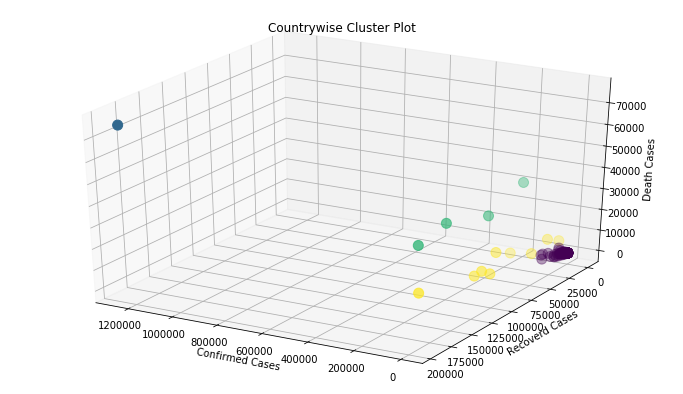

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(countrywise["Confirmed"],countrywise["Recovered"],countrywise["Deaths"], c=countrywise["Clusters"],
           marker='o',s=100)
ax.view_init(azim=120)
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Recoverd Cases')
ax.set_zlabel('Death Cases')
plt.title("Countrywise Cluster Plot")
plt.show()

Cluster 0 is a set of countries which are very less affected, with comapritively low number of Confimed, Recoverd and Death Cases. e.g.  Canada etc.

Cluster 1 is set of countries which are severly affected, with really high number of Confirmed, Recovered and Death Cases. e.g. United States is the only country which belongs to this Cluster.

Cluster 3 belongs to countries which are worst affected with high number of Confirmed Cases but having really good number of Recoverd Cases, with comparitively low number of Deaths as well. e.g. Germany, China etc.

Cluster 2 belongs to countries which are badly affected with high number of Confirmed Cases but having really good number of Recoverd Cases, but really high number of Deaths as well. e.g. Italy, France etc.

#### Comparison of China, Italy, US, Spain and Rest of the World¶



In [123]:
china_data = df_covid[df_covid["Country/Region"] == "Mainland China"]
UK_data = df_covid[df_covid["Country/Region"] == "UK"]
Italy_data = df_covid[df_covid["Country/Region"] == "Italy"]
US_data = df_covid[df_covid["Country/Region"] == "US"]
rest_of_world = df_covid[(df_covid["Country/Region"]!="UK")&(df_covid["Country/Region"]!="US")&
                        (df_covid["Country/Region"]!="Italy")&(df_covid["Country/Region"]!="Mainland China")]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_UK = UK_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [124]:
datewise_restofworld

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,7.0,0.0,0.0
2020-01-23,13.0,0.0,0.0
2020-01-24,23.0,0.0,0.0
2020-01-25,37.0,0.0,0.0
2020-01-26,51.0,3.0,0.0
...,...,...,...
2020-05-03,1867250.0,784763.0,117751.0
2020-05-04,1916029.0,813902.0,120094.0
2020-05-05,1966201.0,844973.0,122726.0


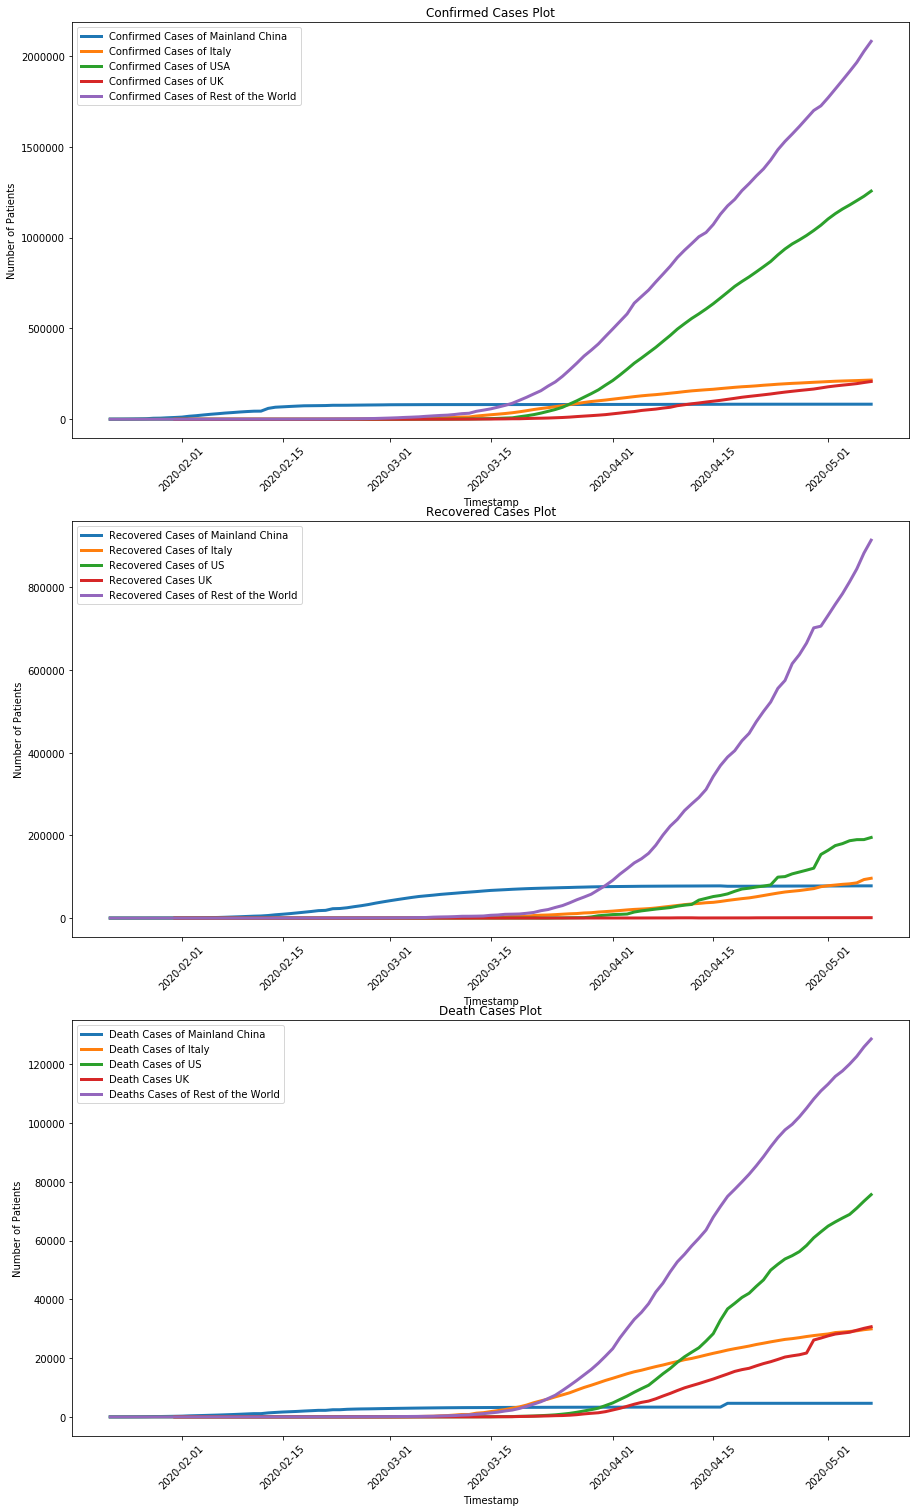

In [127]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,26))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_UK["Confirmed"],label="Confirmed Cases of UK",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_UK["Recovered"],label="Recovered Cases UK",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_UK["Deaths"],label='Death Cases UK',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

In [128]:
datewise

,Confirmed,Recovered,Deaths,Days since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,1 days,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,2 days,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,3 days,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4 days,4,2.644004,2.455146,2010.0,108.0
...,...,...,...,...,...,...,...,...,...
2020-05-03,3506729.0,1125236.0,247470.0,102 days,18,7.057004,32.087909,2134023.0,1372706.0
2020-05-04,3583055.0,1162724.0,251537.0,103 days,19,7.020182,32.450632,2168794.0,1414261.0
2020-05-05,3662691.0,1198832.0,257239.0,104 days,19,7.023224,32.730907,2206620.0,1456071.0


Mortality and recovery rate comparison

In [133]:
datewise_china["Mortality"] = (datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_US["Mortality"] = (datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_UK["Mortality"] = (datewise_UK["Deaths"]/datewise_UK["Confirmed"])*100
datewise_Italy["Mortality"] = (datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Mortality"] = (datewise["Deaths"]/datewise["Confirmed"])*100

In [135]:
datewise_china["Recovery"] = (datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_US["Recovery"] = (datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_UK["Recovery"] = (datewise_UK["Recovered"]/datewise_UK["Confirmed"])*100
datewise_Italy["Recovery"] = (datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_restofworld["Recovery"] = (datewise["Recovered"]/datewise["Confirmed"])*100

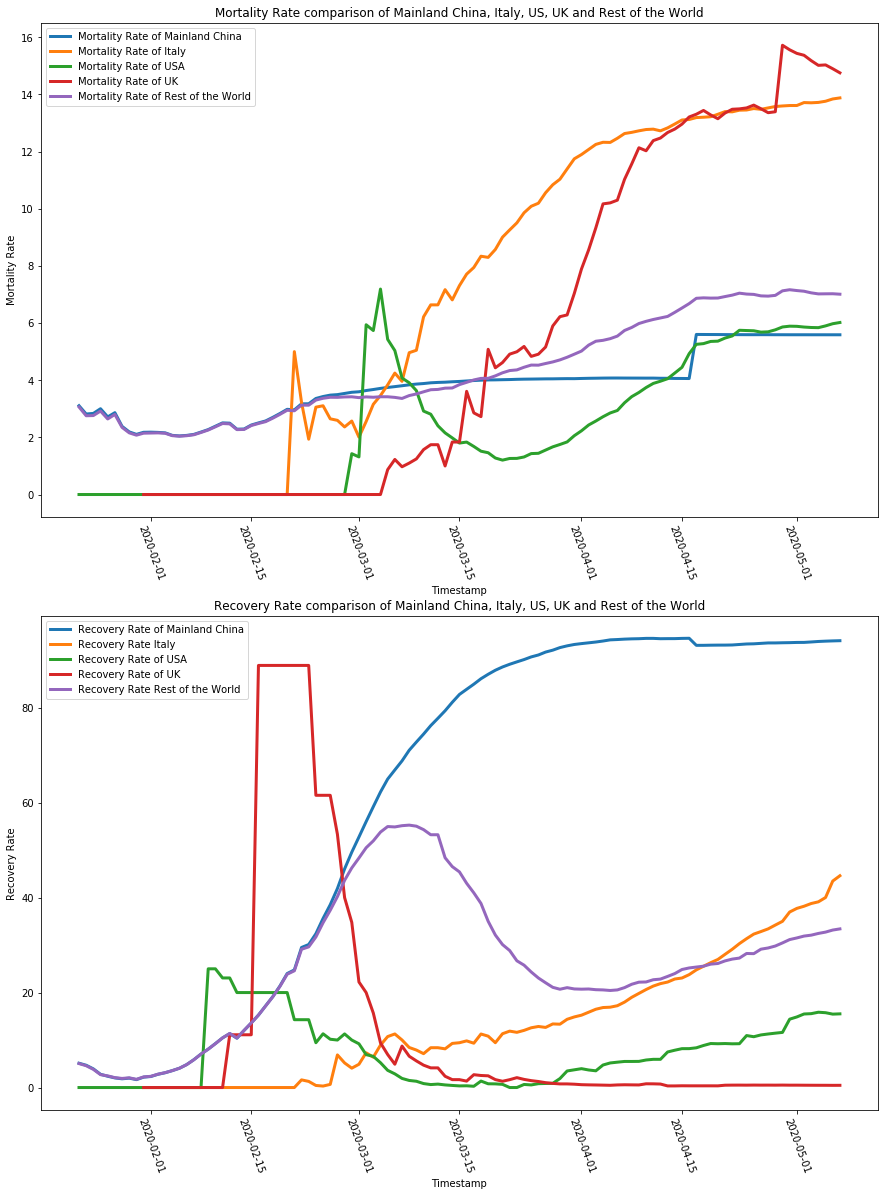

In [143]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,20))

ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_UK["Mortality"],label="Mortality Rate of UK",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, UK and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(-70)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_UK["Recovery"],label="Recovery Rate of UK",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, UK and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(-70)
    

its alarming sign for uk recovery rate is droping down and mortality rate increasing continuesly and best sign for italy that its recovery rate is growing upword.

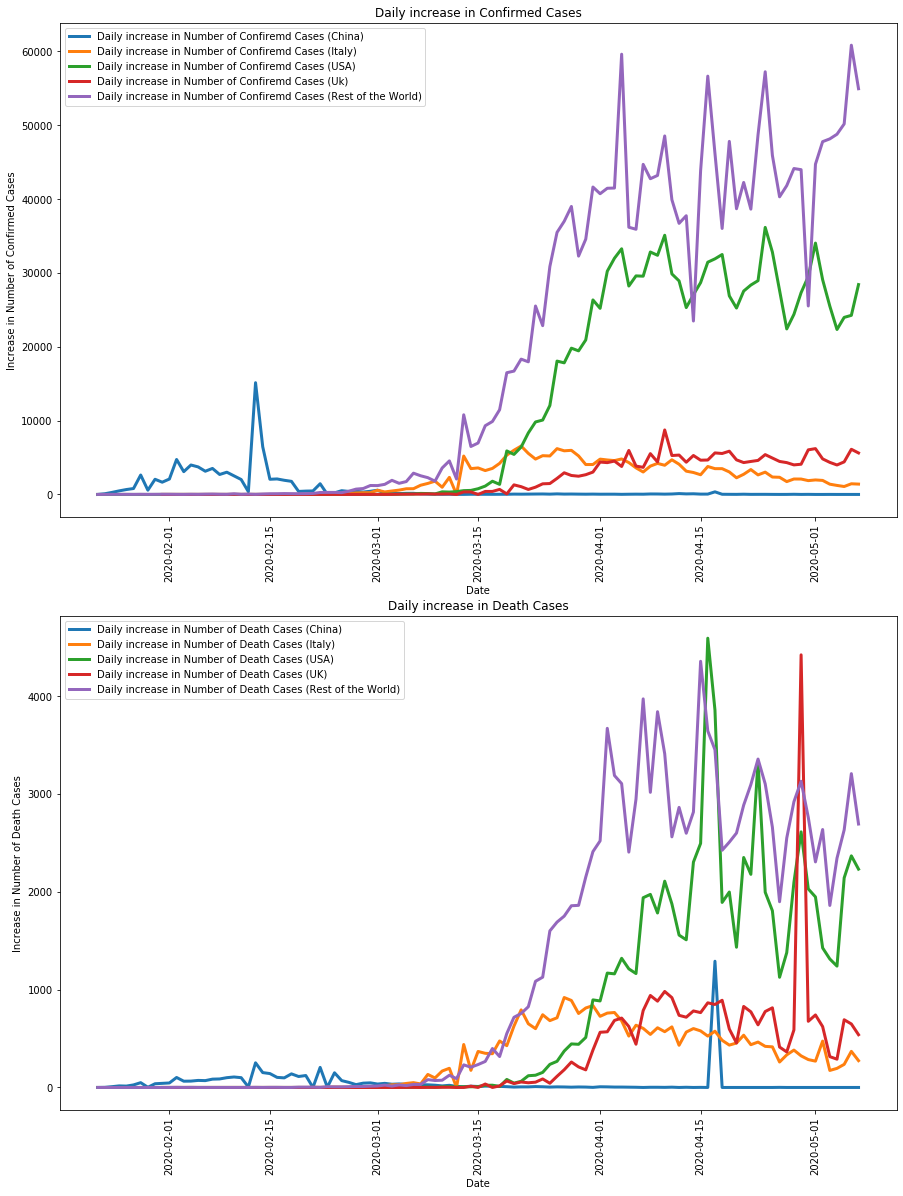

In [145]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_UK["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Uk)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_UK["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (UK)',linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Rest of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Death Cases")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)